The github link:
https://github.com/LanqingZhao/final_project

In [2]:
#Run if you do not have this package
! pip install selenium

     ---------------------------------------- 6.6/6.6 MB 23.3 MB/s eta 0:00:00
     ------------------------------------- 384.9/384.9 kB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00


In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd

from selenium.webdriver.common.by import By
#from selenium.webdriver.support.wait import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC

# 1. Data Gathering
#### Data is gathered by using web scraping from glassdoor.com, and I borrow some codes from some online sources. However, those codes are not compatible due to the update by glassdoor.com, and thus I modfied a lot html info and rewrite some parts to include review information. The codes are identical four parts that capture information of software engineer-related job within 50 mi of DenverSalt Lake City, London, Berlin. They include the field <br>
name-of-company: The name of the company  <br>
review: review by the users of glassdoor.com as 1-5 stars <br>
salary: a string. The salary can be in hourly or annual form, and it can also be in the form of a range from low-end to high end or in the form of fixed number ending with k or per hour <br>
name-of-job: the name of the position offered by the companies post those job posting <br>

#### The code will automatically click the forward to go over the pages, and we need to search the job in order to know how many pages we have to go through. The issue with data is that it will have a large duplicate due to the nature that they are ads. Therefore, it will present an issue when we conduct analysis. I will try to address it in the data cleaning part

reference:https://www.scrapingdog.com/blog/scrape-glassdoor/

In [3]:
# You should monitor the web pages as it may have pop ups 
#You can skip this part because the data are already provided

#denver data
l=list()#all the US info
o={}
# the target first page
target_url = "https://www.glassdoor.com/Job/denver-software-engineer-jobs-SRCH_IL.0,6_IC1148170_KO7,24.htm?radius=50"
driver=webdriver.Chrome(r"C:\Users\zhaol\OneDrive\Desktop\project\chromedriver")
driver.get(target_url)
#open the window, we do encounter pop-ups, and if we do not close them the program will fail
driver.maximize_window()
time.sleep(2)
i=1
#go through all pages and gather info
while i<31:#this number should be reviewed
    # read web
    resp = driver.page_source
    #read html
    soup=BeautifulSoup(resp,'html.parser')
    #find the main block for all job posts 
    allJobsContainer = soup.find("ul",{"class":"css-7ry9k1"})

    allJobs = allJobsContainer.find_all("li")
    #gather info for each job post
    for job in allJobs:
        #find company name and review
        try:
            t = job.find("div",{"class":"d-flex align-items-center"}).text
            if t[-1] =="★":
                o["name-of-company"] = t[:-5]
                o["review"] =t[-5:-1]
            else:
                o["name-of-company"] = t
                o["review"] =None
       
       
        except:
            o["name-of-company"]=None
      #find job name
        try:
            o["name-of-job"]=job.find("div",{"class":"job-title mt-xsm"}).text
        except:
            o["name-of-job"]=None

#find job location
        try:
            o["location"]=job.find("div",{"class":"location mt-xxsm"}).text
        except:
            o["location"]=None
#find job salary

        try:
            o["salary"]=job.find("div",{"class":"salary-estimate"}).text[:-16]
        except:
            o["salary"]=None
#attach jobs to all job
        l.append(o)
#clear info
        o={}
    #scroll down
    scrolling_element= driver.find_element(By.XPATH,"//*[@id='MainCol']")
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrolling_element)
    time.sleep(3)
    #click the forward button
    driver.find_element(By.XPATH, '//*[@id="MainCol"]/div[2]/div/div[1]/button[7]').click()
    time.sleep(3) 
    print("Page "+str(i)+" completed")
    #increment by one
    i+=1
    
driver.close()
# slc will be the same as Denver
print("Doing slc")
target_url = "https://www.glassdoor.com/Job/salt-lake-city-software-engineer-jobs-SRCH_IL.0,14_IC1128289_KO15,32.htm?radius=50"
driver=webdriver.Chrome(r"C:\Users\zhaol\OneDrive\Desktop\project\chromedriver")
driver.get(target_url)

driver.maximize_window()
time.sleep(2)
i=1
while i<18:#this number should be reviewed
   

    resp = driver.page_source
    
    soup=BeautifulSoup(resp,'html.parser')
    
    allJobsContainer = soup.find("ul",{"class":"css-7ry9k1"})

    allJobs = allJobsContainer.find_all("li")

    for job in allJobs:
        try:
            t = job.find("div",{"class":"d-flex align-items-center"}).text
            if t[-1] =="★":
                o["name-of-company"] = t[:-5]
                o["review"] =t[-5:-1]
            else:
                o["name-of-company"] = t
                o["review"] =None
       
       
        except:
            o["name-of-company"]=None

        try:
            o["name-of-job"]=job.find("div",{"class":"job-title mt-xsm"}).text
        except:
            o["name-of-job"]=None


        try:
            o["location"]=job.find("div",{"class":"location mt-xxsm"}).text
        except:
            o["location"]=None


        try:
            o["salary"]=job.find("div",{"class":"salary-estimate"}).text[:-16]
        except:
            o["salary"]=None

        l.append(o)

        o={}
    scrolling_element= driver.find_element(By.XPATH,"//*[@id='MainCol']")
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrolling_element)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="MainCol"]/div[2]/div/div[1]/button[7]').click()
    time.sleep(3) 
    print("Page "+str(i)+" completed")
    i+=1

driver.close()
#save data for the US
df = pd.DataFrame(l)
df.to_csv('jobs_us2.csv', index=False, encoding='utf-8')#edit the name you want to the US data


C:\Users\zhaol\AppData\Local\Temp\ipykernel_15220\1849021830.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(r"C:\Users\zhaol\OneDrive\Desktop\project\chromedriver")


Page 1 completed
Page 2 completed


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.90)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0093A813+48355]
	(No symbol) [0x008CC4B1]
	(No symbol) [0x007D5358]
	(No symbol) [0x007BD293]
	(No symbol) [0x0081E37B]
	(No symbol) [0x0082C473]
	(No symbol) [0x0081A536]
	(No symbol) [0x007F82DC]
	(No symbol) [0x007F93DD]
	GetHandleVerifier [0x00B9AABD+2539405]
	GetHandleVerifier [0x00BDA78F+2800735]
	GetHandleVerifier [0x00BD456C+2775612]
	GetHandleVerifier [0x009C51E0+616112]
	(No symbol) [0x008D5F8C]
	(No symbol) [0x008D2328]
	(No symbol) [0x008D240B]
	(No symbol) [0x008C4FF7]
	BaseThreadInitThunk [0x75DD7D59+25]
	RtlInitializeExceptionChain [0x7745B74B+107]
	RtlClearBits [0x7745B6CF+191]


### The next we repeat the process for the European data

In [4]:
print("Doing london")
l=list()
o={}
target_url = "https://www.glassdoor.com/Job/london-software-engineer-jobs-SRCH_IL.0,6_IC2671300_KO7,24.htm?includeNoSalaryJobs=true&radius=50"

driver=webdriver.Chrome(r"C:\Users\zhaol\OneDrive\Desktop\project\chromedriver")
driver.get(target_url)

driver.maximize_window()
time.sleep(2)
i=1
while i<31:# this number should be reviewed
   

    resp = driver.page_source
    
    soup=BeautifulSoup(resp,'html.parser')
    allJobsContainer = soup.find("ul",{"class":"css-7ry9k1"})

    allJobs = allJobsContainer.find_all("li")

    for job in allJobs:
        try:
            t = job.find("div",{"class":"d-flex align-items-center"}).text
        #t = job.find("div",{"class","ml-xsm job-search-1bgdn7m"}).text
            if t[-1] =="★":
                o["name-of-company"] = t[:-5]
                o["review"] =t[-5:-1]
            else:
                o["name-of-company"] = t
                o["review"] =None
       
       
        except:
            o["name-of-company"]=None

        try:
            o["name-of-job"]=job.find("div",{"class":"job-title mt-xsm"}).text
        except:
            o["name-of-job"]=None


        try:
            o["location"]=job.find("div",{"class":"location mt-xxsm"}).text
        except:
            o["location"]=None


        try:
            o["salary"]=job.find("div",{"class":"salary-estimate"}).text[:-16]
        except:
            o["salary"]=None

        l.append(o)

        o={}
    scrolling_element= driver.find_element(By.XPATH,"//*[@id='MainCol']")
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrolling_element)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="MainCol"]/div[2]/div/div[1]/button[7]').click()
    time.sleep(3) 
    print("Page "+str(i)+" completed")
    i+=1
   
    
driver.close()

target_url = "https://www.glassdoor.com/Job/berlin-software-engineer-jobs-SRCH_IL.0,6_IC2622109_KO7,24.htm?clickSource=searchBox"

driver=webdriver.Chrome(r"C:\Users\zhaol\OneDrive\Desktop\project\chromedriver")
driver.get(target_url)

driver.maximize_window()
time.sleep(2)
i=1
while i<31:#this number should be reviewed
   
    resp = driver.page_source
    
    soup=BeautifulSoup(resp,'html.parser')
    
    allJobsContainer = soup.find("ul",{"class":"css-7ry9k1"})

    allJobs = allJobsContainer.find_all("li")

    for job in allJobs:
        try:
            t = job.find("div",{"class":"d-flex align-items-center"}).text
        #t = job.find("div",{"class","ml-xsm job-search-1bgdn7m"}).text
            if t[-1] =="★":
                o["name-of-company"] = t[:-5]
                o["review"] =t[-5:-1]
            else:
                o["name-of-company"] = t
                o["review"] =None
       
       
        except:
            o["name-of-company"]=None

        try:
            o["name-of-job"]=job.find("div",{"class":"job-title mt-xsm"}).text
        except:
            o["name-of-job"]=None


        try:
            o["location"]=job.find("div",{"class":"location mt-xxsm"}).text
        except:
            o["location"]=None


        try:
            o["salary"]=job.find("div",{"class":"salary-estimate"}).text[:-16]
        except:
            o["salary"]=None

        l.append(o)

        o={}
    scrolling_element= driver.find_element(By.XPATH,"//*[@id='MainCol']")
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', scrolling_element)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="MainCol"]/div[2]/div/div[1]/button[7]').click()
    time.sleep(3) 
    print("Page "+str(i)+" completed")
    i+=1
    
    #print(l)
driver.close()

df = pd.DataFrame(l)
df.to_csv('jobs_eu2.csv', index=False, encoding='utf-8')#edit the file name you want for EU data

Doing london


C:\Users\zhaol\AppData\Local\Temp\ipykernel_15220\1811440093.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(r"C:\Users\zhaol\OneDrive\Desktop\project\chromedriver")


Page 1 completed


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.90)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0093A813+48355]
	(No symbol) [0x008CC4B1]
	(No symbol) [0x007D5358]
	(No symbol) [0x007BD293]
	(No symbol) [0x0081E37B]
	(No symbol) [0x0082C473]
	(No symbol) [0x0081A536]
	(No symbol) [0x007F82DC]
	(No symbol) [0x007F93DD]
	GetHandleVerifier [0x00B9AABD+2539405]
	GetHandleVerifier [0x00BDA78F+2800735]
	GetHandleVerifier [0x00BD456C+2775612]
	GetHandleVerifier [0x009C51E0+616112]
	(No symbol) [0x008D5F8C]
	(No symbol) [0x008D2328]
	(No symbol) [0x008D240B]
	(No symbol) [0x008C4FF7]
	BaseThreadInitThunk [0x75DD7D59+25]
	RtlInitializeExceptionChain [0x7745B74B+107]
	RtlClearBits [0x7745B6CF+191]


# 2. Data Clean and Feature Engineering
#### We have saved our data into two files, and to be honest, they are limited in terms of quality and the number of features. Therefore, we need to clean it and augment the features that can be useful to our goal. We basically discard all rows that miss information, and we will gather features of salary information as well as its location

In [58]:
data_us = pd.read_csv('jobs_us.csv')
data_eu = pd.read_csv('jobs_eu.csv')
print("The size of US data:",len(data_us))
print("The size of Europe data:",len(data_eu))
#sample data of US
data_us.sample(30)


The size of US data: 1410
The size of Europe data: 1800


,name-of-company,review,name-of-job,location,salary
1360,Fidelity Investments,4.3,Senior Cloud Engineer,"Salt Lake City, UT",NaN
429,Comcast,3.8,"Sr. Storage Software Engineer, VIPER","Denver, CO",$119K - $178K
527,Inovonics,3.9,Sr. Firmware Engineer,"Westminster, CO",$85K - $105K
898,Comcast,3.8,"Engineer 2, Network Engineering - Software Def...","Centennial, CO",$66K - $99K
658,Comcast,3.8,"Engineer 2, Network Engineering - Software Def...","Centennial, CO",$66K - $99K
1166,Brivo,4.4,Senior Software Engineer,"Lehi, UT",$89K - $122K
88,"Medpace, Inc.",3.2,UI Software Engineer,"Denver, CO",$70K - $145K
230,SciTec,4.1,Software Test Engineer,"Boulder, CO",$105K - $155K
1349,Codazen,3.8,Senior Full-Stack Engineer,"Salt Lake City, UT",$121K - $155K
118,Denver Public Schools,3.4,"SOFTWARE DEVELOPER, JUNIOR","Denver, CO",$69K - $80K


### The sample of European data

In [59]:
data_eu.sample(20)

,name-of-company,review,name-of-job,location,salary
1285,Deutsche Bahn AG,3.8,Software Engineer:innen als AI Talents gesucht!,Berlin,NaN
600,TalentKompass Deutschland,NaN,Junior Python Developer (Remote Internship – IT),"London, England",NaN
1218,top flow GmbH,3.3,Software Engineer (m/w/d),Berlin,NaN
1774,MBition GmbH,3.8,C/C++ Software Engineer for Vehicle Abstractio...,Berlin,NaN
631,TalentKompass Deutschland,NaN,Junior Frontend Developer (Remote Internship –...,"London, England",NaN
491,"JPMorgan Chase Bank, N.A.",4.1,Software Engineer,"London, England",£70K - £120K
87,NOMURA,4.0,Information Technology - Summer Internship,"London, England",£89K - £94K
886,"JPMorgan Chase Bank, N.A.",4.1,Backend Software Engineer,"London, England",NaN
1660,Mercedes-Benz Group Services Berlin GmbH,3.9,(Junior) Software Entwickler / RPA Engineer (w...,Berlin,NaN
1316,Oselo Recruitment,5.0,Staff Software Engineer,Berlin,€100K


### To see missing data of the US

In [60]:
data_us.isna().sum()

name-of-company      0
review             178
name-of-job          0
location             0
salary             115
dtype: int64

### To see missing data of the Europe

In [61]:
data_eu.isna().sum()

name-of-company      0
review             358
name-of-job          0
location             0
salary             905
dtype: int64

### clean all of the rows that contain missing data in US data

In [62]:
df_us = data_us.dropna()
print("The size of cleaned US data",len(df_us))
df_us.isna().sum()
df_us[df_us['name-of-company']=="University of Utah"]

The size of cleaned US data 1121


,name-of-company,review,name-of-job,location,salary
950,University of Utah,4.2,Programmer/Analyst,"Salt Lake City, UT",$80K
1041,University of Utah,4.2,Software Developer,"Salt Lake City, UT",$65K - $72K
1060,University of Utah,4.2,Software Developer,"Salt Lake City, UT",$65K - $72K
1079,University of Utah,4.2,Software Design Engineer,"Salt Lake City, UT",$48K - $90K


### clean all of the rows that contain missing data in EU data

In [63]:
df_eu=data_eu.dropna().copy()
print("The size of cleaned EU data",len(df_eu))
df_eu.isna().sum()
df_eu[df_eu["location"]=='Germany']

The size of cleaned EU data 732


,name-of-company,review,name-of-job,location,salary
944,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1241,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1271,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1301,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1331,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1361,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1391,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1421,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1451,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K
1482,flaconi,3.4,Senior Software Engineer Backend (all genders),Germany,€52K - €74K


In [64]:
df_eu.sample(20)

,name-of-company,review,name-of-job,location,salary
437,Remit Resources,5.0,Software Tester,"London, England",£50K - £60K
619,University of Reading,4.2,Digital Learning Developer,"Reading, England",£33K - £40K
121,IBM,4.0,Fullstack Engineer,"London, England",£42K - £58K
11,Lloyds Banking Group,3.8,"Java Software Engineer, London, Payment Services","London, England",£72K - £80K
1325,Kineo GmbH,5.0,Junior DevOps / MLOps / Software Engineer (f/m/d),Berlin,€45K - €55K
231,University of Reading,4.2,Digital Learning Developer,"Reading, England",£33K - £40K
562,LEGO,4.5,"Software Engineer - Play (C++, C# )","London, England",£60K - £69K
377,Remit Resources,5.0,Software Tester,"London, England",£50K - £60K
365,Perlego,4.3,Software Engineering Internship,"London, England",£25K
143,Hyster-Yale Group,3.5,Robotics Software Engineer,"Frimley, England",£56K - £72K


In [65]:
df_us.sample(20)

,name-of-company,review,name-of-job,location,salary
84,Zynex Medical,4.3,Backend and Interoperability Software Developer,"Englewood, CO",$70K - $110K
1199,Musely,3.9,"Software Engineer, Server Applications (J2EE)","Salt Lake City, UT",$75K - $109K
638,Comcast,3.8,Software Development Engineer 3 (Full Stack),"Englewood, CO",$108K - $163K
299,Aegis Premier Technologies,4.1,Senior C# Software Engineer,"Westminster, CO",$83K - $119K
876,SAGEMCOM (92500),3.7,Software Developer (Embedded Linux),"Denver, CO",$80K - $115K
890,SciTec,4.1,Software Test Engineer,"Boulder, CO",$105K - $155K
832,Jobot,4.5,Rust Solutions Engineer - Remote,"Denver, CO",$125K - $300K
184,Particle Measuring Systems,3.4,Sr. Engineering Software Support Specialist,"Boulder, CO",$80K - $90K
27,Service Core,4.5,Software Engineer 1,"Denver, CO",$70K - $90K
1365,Endevis,4.0,Software Developer,"Salt Lake City, UT",$62K - $93K


# Find median/high/low yearly numerical salary
#### The salary is in the form of string either in a range for annual salary or in the range for hourly salary. This section is to find numerical median yearly salary. We would use the regular expression to find the high and low, as well as the median salary for each position, and we create three new column as three new features. 
#### Some of the salary strings display hourly salary, we will assume in both case that a empolyee works 40 hours a week and 52 weeks a year. Thus, we mutiply hourly rate by 40*52<br><br>
#### Here are the new columns
clean_salary: the median salary. If the salary is a single value, then it will be such value <br>
high_salary: the higher end given by glassdoor.com.If the salary is a single value, then it will be such value<br>
low_salary: the lower end given by glassdoor.com. If the salary is a single value, then it will be such value<br>

#### From previous part, we have noticed the duplicates of job posts due to the nature that this website posts ads, and thus we will also remove all duplicates. The thresthold is if  every columns are identical. What we are interested in is the salary and review, so we could have same position with different salary if possible

In [66]:
import re
import statistics as st
#convert hourly salary to annual
def hour2year(x):
    if x[-8:]=="Per Hour" or x[-8:]=="per hour":
        numbers = re.findall(r'\d+\.?\d*',x)
        numbers = [str(float(number)*40*52/1000)+"k" for number in numbers]
        if len(numbers)>1:
            return'-'.join(numbers)
        else:
            return numbers[0]
    else:
        return x
        
df_us_1=df_us.copy()
df_us_1["salary"] = df_us_1["salary"].apply(hour2year)
def to_median(x):
    numbers = re.findall(r'\d+\.?\d*', x)
    values = [float(number)*1000 for number in numbers]
    return st.median(values)
def to_max(x):
    numbers = re.findall(r'\d+\.?\d*', x)
    values = [float(number)*1000 for number in numbers]
    return max(values)
def to_min(x):
    numbers = re.findall(r'\d+\.?\d*', x)
    values = [float(number)*1000 for number in numbers]
    return min(values)
df_us_1["clean_salary"] = df_us_1["salary"].apply(to_median)
df_us_1["high_salary"] = df_us_1["salary"].apply(to_max)
df_us_1["low_salary"]= df_us_1["salary"].apply(to_min)
display(df_us_1.sample(15))
df_us= df_us_1.copy()
df_us = df_us.drop_duplicates()
print(len(df_us))


,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary
48,Jobot,4.5,Lead Software Engineer,"Denver, CO",$150K - $180K,165000.0,180000.0,150000.0
968,American Cruise Lines,3.5,"Full-Stack Developer- Sandy, UT","Salt Lake City, UT",$42K - $60K,51000.0,60000.0,42000.0
1141,Idaho Scientific,3.4,Linux Kernel Driver Developer,"Salt Lake City, UT",$80K - $150K,115000.0,150000.0,80000.0
544,Particle Measuring Systems,3.4,Sr. Engineering Software Support Specialist,"Boulder, CO",$80K - $90K,85000.0,90000.0,80000.0
474,Computershare,3.6,Software Developer (BPM/Workflow/Pega),"Greenwood Village, CO",$80K - $114K,97000.0,114000.0,80000.0
898,Comcast,3.8,"Engineer 2, Network Engineering - Software Def...","Centennial, CO",$66K - $99K,82500.0,99000.0,66000.0
1163,L3Harris Technologies,3.8,"Scientist, Software Engineer (FPGA Design)","Salt Lake City, UT",$102K - $141K,121500.0,141000.0,102000.0
356,Creative Financial Staffing,4.7,Software Engineer,"Denver, CO",$100K - $130K,115000.0,130000.0,100000.0
1168,Codazen,3.8,Senior Full-Stack Engineer,"Salt Lake City, UT",$121K - $155K,138000.0,155000.0,121000.0
748,Aegis Premier Technologies,4.1,Senior C# Software Engineer,"Westminster, CO",$83K - $119K,101000.0,119000.0,83000.0


232


## Convert the GBP or EURO to USD and obtain median/high/low
#### The european salary data is either in euro or gbp, so we need to convert it directly as the US data to annual median ,high,  or low salary.
The exchange rate I used is 1.24 usd to 1 gbp and 1.07 usd to 1 euro <br>
This section uses similar method of regluar expression to convert salary string to numerical values.<br?
#### Similarly, we will also remove all duplicates. Then we are only left with 1/5 of data as well.

In [67]:
#
def m2usd(x):
    if x[0] =="£":
        if x[-8:]=="Per Hour" or x[-8:]=="per hour":
            numbers = re.findall(r'\d+\.?\d*',x)
            
            numbers = [(float(number)*40*52)*1.24 for number in numbers]
            return st.median(numbers)
        else:
            numbers = re.findall(r'\d+\.?\d*', x)
            values = [float(number)*1000*1.24 for number in numbers]
            return st.median(values)
    elif x[0]== "€":
        if x[-8:]=="Per Hour" or x[-8:]=="per hour":
            numbers = re.findall(r'\d+\.?\d*',x)
            numbers = [(float(number)*40*52)*1.07 for number in numbers]
            return st.median(numbers)
        else:
            numbers = re.findall(r'\d+\.?\d*', x)
            values = [float(number)*1000*1.07 for number in numbers]
            return st.median(values)
def h2usd(x):
    if x[0] =="£":
        if x[-8:]=="Per Hour" or x[-8:]=="per hour":
            numbers = re.findall(r'\d+\.?\d*',x)
            
            numbers = [(float(number)*40*52)*1.24 for number in numbers]
            return max(numbers)
        else:
            numbers = re.findall(r'\d+\.?\d*', x)
            values = [float(number)*1000*1.24 for number in numbers]
            return max(values)
    elif x[0]== "€":
        if x[-8:]=="Per Hour" or x[-8:]=="per hour":
            numbers = re.findall(r'\d+\.?\d*',x)
            numbers = [(float(number)*40*52)*1.07 for number in numbers]
            return max(numbers)
        else:
            numbers = re.findall(r'\d+\.?\d*', x)
            values = [float(number)*1000*1.07 for number in numbers]
            return max(values)
def l2usd(x):
    if x[0] =="£":
        if x[-8:]=="Per Hour" or x[-8:]=="per hour":
            numbers = re.findall(r'\d+\.?\d*',x)
            
            numbers = [(float(number)*40*52)*1.24 for number in numbers]
            return min(numbers)
        else:
            numbers = re.findall(r'\d+\.?\d*', x)
            values = [float(number)*1000*1.24 for number in numbers]
            return min(values)
    elif x[0]== "€":
        if x[-8:]=="Per Hour" or x[-8:]=="per hour":
            numbers = re.findall(r'\d+\.?\d*',x)
            numbers = [(float(number)*40*52)*1.07 for number in numbers]
            return min(numbers)
        else:
            numbers = re.findall(r'\d+\.?\d*', x)
            values = [float(number)*1000*1.07 for number in numbers]
            return min(values)
#print(h2usd("€30 - €40 Per Hour"))
df_eu_1 = df_eu.copy()
df_eu_1["clean_salary"] = df_eu_1["salary"].apply(m2usd)
df_eu_1["high_salary"] = df_eu_1["salary"].apply(h2usd)
df_eu_1["low_salary"] = df_eu_1["salary"].apply(l2usd)
df_eu = df_eu_1.copy()
#remove duplicates
df_eu = df_eu.drop_duplicates()
print(len(df_eu))
df_eu.sample(15)


117


,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary
8,Next DLP,5.0,Graduate/Junior Frontend Developer,"London, England",£55K - £75K,80600.0,93000.0,68200.0
74,IBM,4.0,Fullstack Engineer,"London, England",£42K - £58K,62000.0,71920.0,52080.0
1077,Autohaus Royal GmbH,1.0,(Senior) Softwareentwickler Full Stack inkl. 1...,Berlin,€8K,8560.0,8560.0,8560.0
58,Coforge Ltd,4.0,Junior Software Engineer,"Milton Keynes, England",£30K - £35K,40300.0,43400.0,37200.0
34,Remit Resources,5.0,Software Tester,"London, England",£50K - £60K,68200.0,74400.0,62000.0
139,Privitar,3.3,Software Engineer,"London, England",£64K - £74K,85560.0,91760.0,79360.0
66,Reqiva Ltd,4.5,Data Software Engineer | Python,"London, England",£55K - £75K,80600.0,93000.0,68200.0
11,Lloyds Banking Group,3.8,"Java Software Engineer, London, Payment Services","London, England",£72K - £80K,94240.0,99200.0,89280.0
918,Yilu Travel Services GmbH,3.6,Senior Software Engineer - Backend (m/f/d),Berlin,€85K,90950.0,90950.0,90950.0
18,Burberry,3.5,Software Engineer,"London, England",£39K - £48K,53940.0,59520.0,48360.0


# Add state or country as a seperate column
## In this section, we will extract information of the locations of jobs. For both datasets, we will add columns of country and code.<br>

### For code, here are the meaning of code:<br>
1: Greater Denver area<br>
2: Greater Salt Lake City area<br>
3: London, England<br>
4:  Berlin<br>
5: Non-London locations in England<br>
### Country code will be simpler:<br>
CO and UT : US<br>
England: UK<br>
Germany: DE<br>

Additionally, for the US data set, we will also add a column of State, which can be useful for our further analysis

#### The following is the counting of locations, and we can see in our US data set, the jobs are still concentrated on two big cities.

In [68]:
y=(df_us["location"].groupby(df_us["location"]).count())
y.columns =["count"]
display(y[y.values>5])

location
Boulder, CO           17
Denver, CO            52
Draper, UT             9
Englewood, CO         14
Lehi, UT              11
Littleton, CO          8
Provo, UT             11
Salt Lake City, UT    48
Name: location, dtype: int64

#### The EU data set, the data are primarily within London, and Berlin has much fewer rows than London. My understanding is that it is because I gathered information from an English language website, and in Germany they may do their job posting in German language website.

In [69]:
y= df_eu.groupby("location").count()

#### In this part, we will encode our location into code column

In [70]:
df_us = df_us.loc[df_us["location"]!="United States"]
df_us["State"] = df_us["location"].str[-2:]
def find_co(x):
    if x[0]=="£":#gbp
        return "GB"
    else:#euro
        return "DE"
df_eu["Country"] = df_eu["salary"].apply(find_co)
def is_lb(x):
    if x[0:6]=="London":
        return 3
    elif x[0:6] =="Berlin":
        return 4
    elif x[-7:]=="England":
        return 5
    else:
        return 4
def which_state(x):
    if x=="CO":
        return 1
    else:
        return 2
df_us["code"] = df_us["State"].apply(which_state)
df_us["Country"] ="US"
df_eu["code"] = df_eu["location"].apply(is_lb)


In [71]:
df_us.sample(20)

,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary,State,code,Country
167,Simpson Strong-Tie,4.0,Senior Software QA Engineer (Open to Remote),"Boulder, CO",$84K - $110K,97000.0,110000.0,84000.0,CO,1,US
86,EVgo,3.7,Software Engineer,"Denver, CO",$67K - $97K,82000.0,97000.0,67000.0,CO,1,US
1070,CyberCoders,4.2,Machine Learning Engineer (4-Day Work Week),"Provo, UT",$120K - $150K,135000.0,150000.0,120000.0,UT,2,US
55,P2 Energy Solutions,4.0,Associate Software Engineer,"Denver, CO",$64K - $92K,78000.0,92000.0,64000.0,CO,1,US
973,Tesla,3.6,"Software Engineer - Frontend (React.js), Tesla...","Draper, UT",$43K - $66K,54500.0,66000.0,43000.0,UT,2,US
1040,CyberCoders,4.2,REMOTE Staff Software Development Engineer in ...,"Salt Lake City, UT",$160K - $220K,190000.0,220000.0,160000.0,UT,2,US
47,DaqScribe Solutions,5.0,Jr. Software Engineer,"Centennial, CO",$72K - $108K,90000.0,108000.0,72000.0,CO,1,US
106,Cloud Shift Technologies LLC,5.0,Java Developer,"Denver, CO",124.8k-145.6k,135200.0,145600.0,124800.0,CO,1,US
20,Comcast,3.8,Senior Java Engineer,"Englewood, CO",$125K - $187K,156000.0,187000.0,125000.0,CO,1,US
83,Heska Corporation,3.4,"Engineer II, Software Frontend","Loveland, CO",$90K - $110K,100000.0,110000.0,90000.0,CO,1,US


In [72]:
df_eu.sample(30)

,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary,Country,code
907,Kineo GmbH,5.0,Junior DevOps / MLOps / Software Engineer (f/m/d),Berlin,€45K - €55K,53500.0,58850.0,48150.0,DE,4
40,Veeva Systems,4.1,Frontend Engineer (React/Remote),"London, England",£39K - £48K,53940.0,59520.0,48360.0,GB,3
10,Oxford Quantum Circuits,5.0,Junior Software Engineer,"Reading, England",£28K - £35K,39060.0,43400.0,34720.0,GB,5
113,Understanding Recruitment,4.5,Software Engineer,"London, England",£100K - £120K,136400.0,148800.0,124000.0,GB,3
916,Aaron.ai,4.4,IT Support Engineer (m/f/d),Berlin,€40K - €45K,45475.0,48150.0,42800.0,DE,4
63,Deutsche Bank,3.9,Agile Software Engineer,"London, England",£60K - £89K,92380.0,110360.0,74400.0,GB,3
179,Client Server,4.4,Backend Software Engineer Python Data,"London, England",£65K - £80K,89900.0,99200.0,80600.0,GB,3
6,EDF Limited,3.8,Software Engineer (Backend),"London, England",£48K - £65K,70060.0,80600.0,59520.0,GB,3
16,Monzo,3.9,Backend Engineer,"London, England",£75K - £100K,108500.0,124000.0,93000.0,GB,3
114,Understanding Recruitment,4.5,Software Engineer - Backend,"London, England",£45K - £75K,74400.0,93000.0,55800.0,GB,3


## We will just have salary feature with code and company name for a new combined data set
#### We will just select cleaned data with high, low, ormedian salary in usd, code, and company name for a simplified dataframe for our analysis part

In [73]:
#Combine Median salary
df_salary_us = df_us[["clean_salary","code","name-of-company"]]
df_salary_eu = df_eu[["clean_salary","code","name-of-company"]]
combined_salary = pd.concat([df_salary_us, df_salary_eu])
display(combined_salary.sample(15))
#Combine high salary
df_high_us = df_us[["high_salary","code","name-of-company"]]
df_high_eu = df_eu[["high_salary","code","name-of-company"]]
combined_high = pd.concat([df_high_us, df_high_eu])
#Combine low salary
df_low_us = df_us[["low_salary","code","name-of-company"]]
df_low_eu = df_eu[["low_salary","code","name-of-company"]]
combined_low = pd.concat([df_low_us, df_low_eu])

,clean_salary,code,name-of-company
25,115000.0,1,Creative Financial Staffing
947,76000.0,2,bioMerieux SA
1032,57033.6,2,Utah County Government
54,110000.0,1,Service Core
61,45260.0,5,University of Reading
171,110000.0,1,Power Home Remodeling
1038,118000.0,2,Young Living Essential Oils
27,80000.0,1,Service Core
4,117800.0,3,"JPMorgan Chase Bank, N.A."
141,102000.0,1,JLL


### The above is median

### Display high salary

In [74]:
display(combined_high.sample(15))

,high_salary,code,name-of-company
907,165000.0,2,Capstone Consulting Inc.
113,80000.0,1,Aegis Premier Technologies
10,175000.0,1,Jobot
32,91760.0,3,NatWest Group
1019,115000.0,2,Crumbl Cookies
107,146000.0,1,Tipico - North America
42,111600.0,3,Funding Circle UK
108,80000.0,1,Datalab USA
924,150000.0,2,Synchrony Financial
99,124800.0,1,ClientSolv Technologies


#### Display low salary

In [75]:
display(combined_low.sample(15))

,low_salary,code,name-of-company
957,89000.0,2,Henry Schein One
29,83000.0,1,Aegis Premier Technologies
17,66960.0,3,Kroo
15,108000.0,1,Comcast
16,93000.0,3,Monzo
177,135200.0,1,Brooksource
1066,119000.0,2,Adobe
974,64000.0,2,XEL IT Solutions
1001,62000.0,2,SCALAR
67,65000.0,1,The University Of Denver


# 3 Visualization and Analysis
 #### This section will focus on visualizing our data and analyze it using some statistics methods to find answers to our research questions. I will compare our encoded region 1 to 5 with all specturm of salary, and I will also compare within the US data set the difference between Denver and SLC. Additionally, I will also display and analyze the review data to see if there is correlation between them

#### The first figure the average median salary comparison between 5 encoded regions. We will see clearly Denver has the highest and the non-London has the lowest

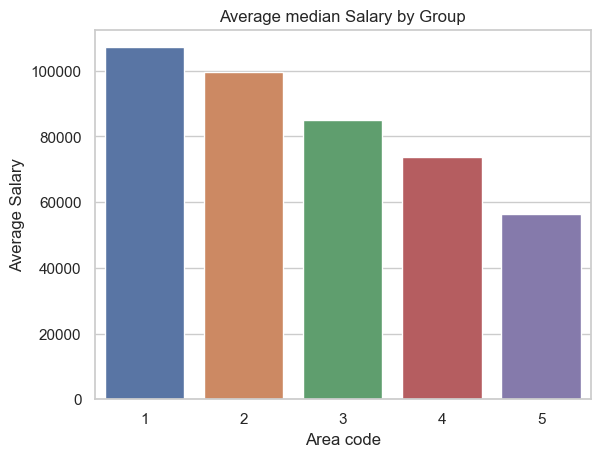

       clean_salary
code               
1     107101.768067
2      99701.664286
3      85068.275862
4      73678.862500
5      56331.428571


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
aver = combined_salary[["clean_salary","code"]].groupby("code").mean()
sns.barplot(x=aver.index, y='clean_salary', data=aver)
plt.xlabel('Area code')
plt.ylabel('Average Salary')
plt.title('Average median Salary by Group')
plt.show()
print(aver)


#### This also displays how many job post availible for each five regions. We can see that Berlin and Non-London are significantly lower than the rest.

In [77]:
print(combined_salary[["code","clean_salary"]].groupby("code").count())

      clean_salary
code              
1              119
2              112
3               87
4               16
5               14


#### This figure display the average review by star of each region. We will see that non london is silightly higher than the rest. However, every region is similar.

348
264


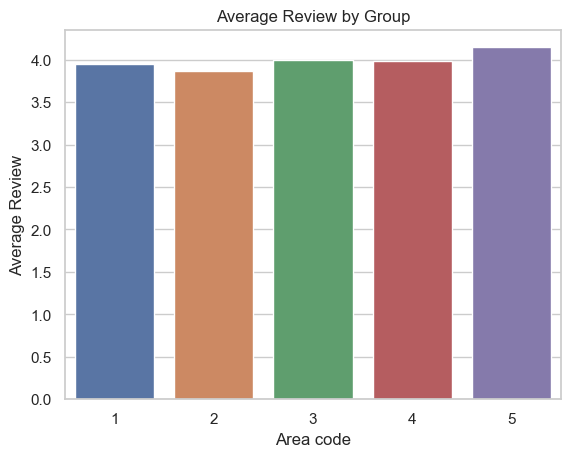

        review
code          
1     3.946429
2     3.870588
3     3.998507
4     3.986667
5     4.146154


In [78]:
df_r_us = df_us[["review","code","name-of-company"]]
df_r_eu = df_eu[["review","code","name-of-company"]]
combined_r = pd.concat([df_r_us, df_r_eu])
print(len(combined_r))
#remove dulicate companies
combined_r = combined_r.drop_duplicates()
print(len(combined_r))
combined_r.sample(30)

aver_r = combined_r[["review","code"]].groupby("code").mean()
sns.barplot(x=aver.index, y='review', data=aver_r)
plt.xlabel('Area code')
plt.ylabel('Average Review')
plt.title('Average Review by Group')
plt.show()
print(aver_r)

### The boxplots
#### The boxplot of high, median, or low salary can tell us that the salary in Denver and SLC are higher than that in Europe. We can also see there are outlier in SLC part. Within EU data, London is much higher than non-London.<br>
#### The outlier may be caused by the single value data from the salary column

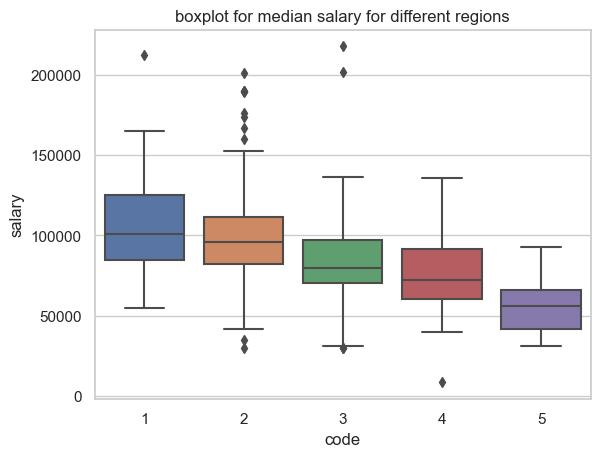

In [79]:
sns.boxplot(data=combined_salary,x="code",y="clean_salary")

plt.xlabel('code')
plt.ylabel('salary')
plt.title('boxplot for median salary for different regions')
plt.show()

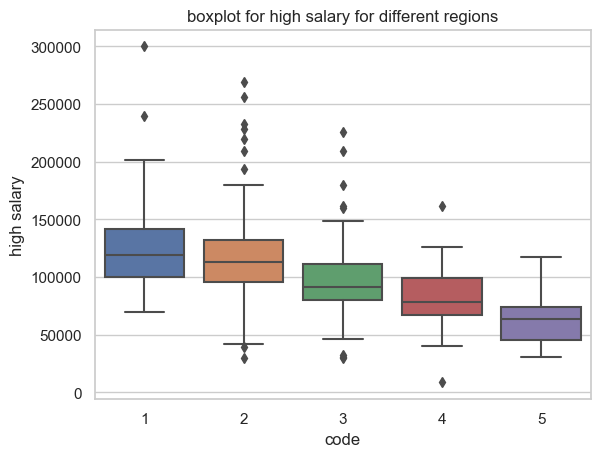

In [80]:
sns.boxplot(data=combined_high,x="code",y="high_salary")

plt.xlabel('code')
plt.ylabel('high salary')
plt.title('boxplot for high salary for different regions')
plt.show()

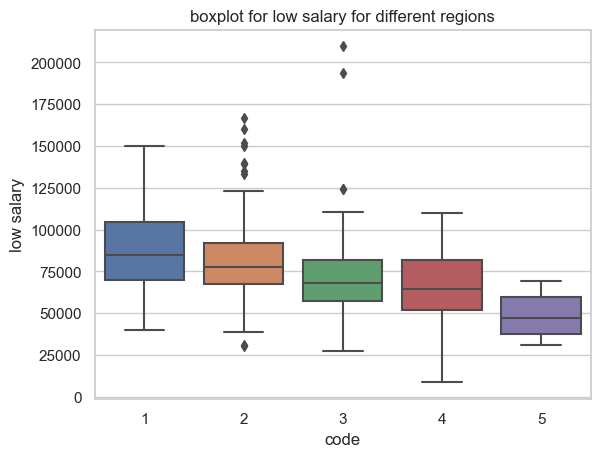

In [81]:
sns.boxplot(data=combined_low,x="code",y="low_salary")

plt.xlabel('code')
plt.ylabel('low salary')
plt.title('boxplot for low salary for different regions')
plt.show()

### The boxplot for review
#### We can clearly see that the code 4 the German componies have the highest review, and the American companies have similar review around 3.5 to 4.5. The non london companies have higher than the london based companies. It will trigger us to have a question on the correlation of salary and review

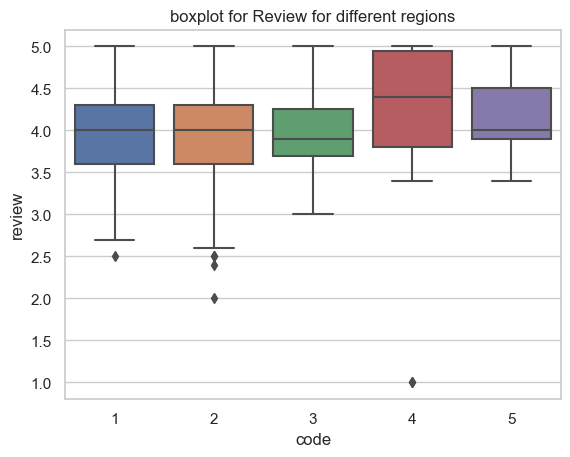

In [82]:
sns.boxplot(data=combined_r,x="code",y="review")

plt.xlabel('code')
plt.ylabel('review')
plt.title('boxplot for Review for different regions')
plt.show()

### The country comparison
#### I also compare the salary differences between 3 countries. I, therefore, will combine all data together, and they are the same in terms of the information of salary, name of company, name of job, and review<br>

### I will first display the median salary combination

In [83]:
df_usa_o = df_us[["Country",'clean_salary',"review",'name-of-company']]
df_eu_o = df_eu[["Country",'clean_salary',"review",'name-of-company']]
df_by_co =pd.concat([df_usa_o, df_eu_o])
df_by_co.sample(20)


,Country,clean_salary,review,name-of-company
1065,US,75500.0,4.2,Zartico
169,GB,74400.0,3.6,Verisart
34,GB,68200.0,5.0,Remit Resources
9,US,135500.0,3.8,Comcast
987,US,87500.0,4.1,bioMerieux SA
904,US,98500.0,4.7,Arkham Technology Ltd.
953,US,112000.0,3.8,"Stefanini, Inc"
139,US,100000.0,3.4,Heska Corporation
58,US,112000.0,4.5,DeNOVO Solutions
998,US,87000.0,5.0,Imagicom Corporation


### This part computes the mean, max, min, and median of each country

In [84]:
aver_co =df_by_co[["clean_salary","Country"]].groupby("Country").mean()
max_co = df_by_co[["clean_salary","Country"]].groupby("Country").max()
min_co = df_by_co[["clean_salary","Country"]].groupby("Country").min()
med_co = df_by_co[["clean_salary","Country"]].groupby("Country").median()
df_com_stat = pd.concat([aver_co,max_co,min_co,med_co],axis=1)
df_com_stat.columns=["mean","max","min","median"]

### The results are displayed

In [85]:
df_com_stat

,mean,max,min,median
Country,,,,
DE,73678.862500,135890.0,8560.0,72225.0
GB,81084.950495,217620.0,29760.0,75020.0
US,103513.838961,212500.0,30160.0,98500.0


### This part is also to find out which positions have those values 

In [86]:
print("max in London")
display(df_eu[df_eu["clean_salary"]==217620])
print("min in Berlin")
display(df_eu[df_eu["clean_salary"]==8560])
print("max in CO/UT")
display(df_us[df_us["clean_salary"]==212500])
print("min in CO/UT")
display(df_us[df_us["clean_salary"]==30160])

max in London


,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary,Country,code
112,Source Group International,4.5,"Software Engineer - C#, .Net SQL","London, England",£81.25 - £87.50 Per Hour,217620.0,225680.0,209560.0,GB,3


min in Berlin


,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary,Country,code
1077,Autohaus Royal GmbH,1.0,(Senior) Softwareentwickler Full Stack inkl. 1...,Berlin,€8K,8560.0,8560.0,8560.0,DE,4


max in CO/UT


,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary,State,code,Country
21,Jobot,4.5,Rust Solutions Engineer - Remote,"Denver, CO",$125K - $300K,212500.0,300000.0,125000.0,CO,1,US


min in CO/UT


,name-of-company,review,name-of-job,location,salary,clean_salary,high_salary,low_salary,State,code,Country
962,Alliance Benefit Group-Rocky Mountain,3.8,Junior Software Developer,"Midvale, UT",30.16k,30160.0,30160.0,30160.0,UT,2,US


### The bar chart of the statistics of median salary
#### The bar chart shows that the UK data actually has a higher max median salary than the US data. However, in terms of median and mean, the US is the highest.

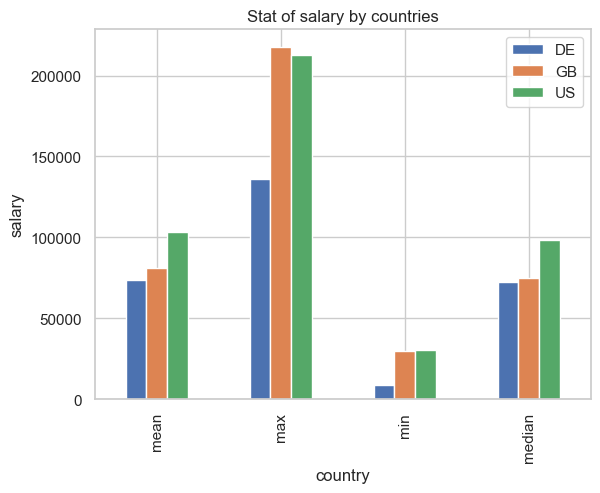

In [87]:
df_com_stat.transpose().plot.bar()
plt.xlabel('country')
plt.ylabel('salary')
plt.title('Stat of salary by countries')
plt.legend()
plt.show()

### The 75 percentile
#### The 75% is also computed to avoid the issue of outlier

In [88]:
co75 = df_by_co[["clean_salary","Country"]].groupby("Country").quantile([0.75])
co75=co75.reset_index(level=["Country"])
co75

,Country,clean_salary
0.75,DE,91618.75
0.75,GB,94240.00
0.75,US,117750.00


### The bar chart of the 3 countries
#### The bar chart of average median salary for countries is also displayed to show the comparison. We can observe that a similar conclusion that the US data shows a higher salary.

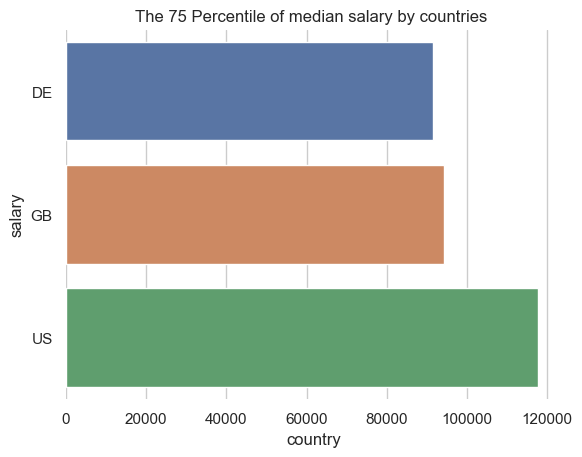

In [89]:
sns.set_theme(style="whitegrid")
sns.barplot(y="Country",x="clean_salary",data=co75,orient='h')
plt.xlabel('country')
plt.ylabel('salary')
plt.title('The 75 Percentile of median salary by countries ')
sns.despine(left=True, bottom=True)
plt.show()

### The boxplot of 3 countries
#### We can see from the boxplot that the US data has a couple of outliers, so as the UK. It also gives us the idea that the salary in the US data is much higher than German ones as the median value for the US data is higher than the 75 percentile

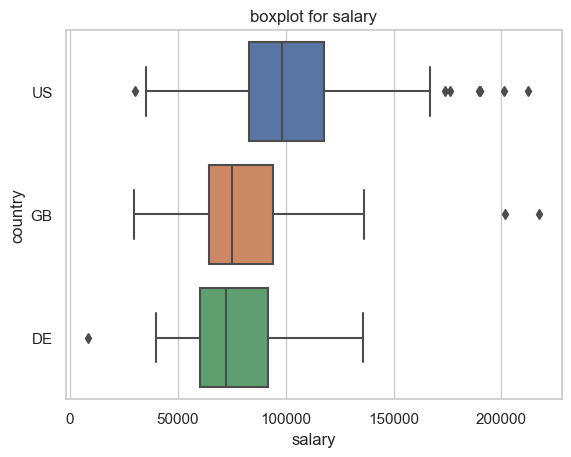

In [90]:
sns.boxplot(data=df_by_co,x="clean_salary",y="Country")

plt.ylabel('country')
plt.xlabel('salary')
plt.title('boxplot for salary')
plt.show()

## The Answer to research question:
#### We will try to figure out if statistically speaking there is a difference in salary between the Denver/SLT, London, and Berlin. Previously, we show the boxplot and bar chart to visually see the data, and in this part we will use one-way ANOVA to test the data

In [91]:
! pip install researchpy

### Conduct one-way anova for 3 different country, and we can see the result shows that at least two countries are statsitcally different.

In [92]:
import scipy.stats as stats
import researchpy as rp

stats.f_oneway(df_by_co["clean_salary"][df_by_co["Country"]=="DE"],
              df_by_co["clean_salary"][df_by_co["Country"]=="GB"],
             df_by_co["clean_salary"][df_by_co["Country"]=="US"])

F_onewayResult(statistic=23.995145357386534, pvalue=1.7495639443197104e-10)

### Conduct one-way ANOVA between the US and Germany, we can see it is also statistcally signicantly different

In [93]:
stats.f_oneway(df_by_co["clean_salary"][df_by_co["Country"]=="DE"],
              df_by_co["clean_salary"][df_by_co["Country"]=="US"])

F_onewayResult(statistic=14.653248643615308, pvalue=0.0001641174468301359)

### Conduct one-way ANOVA between the US and UK, we can see it is also statistcally signicantly different

In [94]:
stats.f_oneway(df_by_co["clean_salary"][df_by_co["Country"]=="GB"],
              df_by_co["clean_salary"][df_by_co["Country"]=="US"])

F_onewayResult(statistic=39.06108873286819, pvalue=1.268210279876333e-09)

### Conduct one-way ANOVA between the UK and Germany, we can see it is not statistcally signicantly different

In [95]:
stats.f_oneway(df_by_co["clean_salary"][df_by_co["Country"]=="DE"],
              df_by_co["clean_salary"][df_by_co["Country"]=="GB"])

F_onewayResult(statistic=0.844698441212015, pvalue=0.3599801910102467)

### We have some overview of statistical data for the salary by 3 different countries.

In [96]:
rp.summary_cont(df_by_co["clean_salary"].groupby(df_by_co["Country"]))

,N,Mean,SD,SE,95% Conf.,Interval
Country,,,,,,
DE,16,73678.8625,30098.4037,7524.6009,57640.5553,89717.1697
GB,101,81084.9505,29925.2111,2977.6698,75177.3384,86992.5626
US,231,103513.8390,30152.5432,1983.8917,99604.9141,107422.7638


### Comparison between the Greater Denver area and Greater SLC area
#### The results of one-way anova shows that they are slightly behind the benchmark. We can conclude there is a different at 90% confidence level.

In [97]:
rp.summary_cont(df_us["clean_salary"].groupby(df_us["State"]))

,N,Mean,SD,SE,95% Conf.,Interval
State,,,,,,
CO,119,107101.7681,27733.5589,2542.3312,102067.2602,112136.2760
UT,112,99701.6643,32214.2517,3043.9607,93669.8530,105733.4756


In [98]:
stats.f_oneway(df_us["clean_salary"][df_us["State"]=="CO"],
             df_us["clean_salary"][df_us["State"]=="UT"])

F_onewayResult(statistic=3.5131805365203927, pvalue=0.06215566829468198)

### The comparsion between London and Non-London
#### We can clearly see the statistically significant difference between the salary in London and Non-London

In [99]:
rp.summary_cont(df_eu["clean_salary"].groupby(df_eu["code"]))

,N,Mean,SD,SE,95% Conf.,Interval
code,,,,,,
3,87,85068.2759,29640.5270,3177.7981,78751.0224,91385.5293
4,16,73678.8625,30098.4037,7524.6009,57640.5553,89717.1697
5,14,56331.4286,17621.7937,4709.6225,46156.9078,66505.9493


In [100]:
stats.f_oneway(df_eu["clean_salary"][df_eu["code"]==3],
             df_eu["clean_salary"][df_eu["code"]==5])

F_onewayResult(statistic=12.38693835334386, pvalue=0.0006549541009645499)

### The correlation between review and median salary
#### The result shows there is not a strong correlation between salary and review

In [101]:
df_by_co.corr()

C:\Users\zhaol\AppData\Local\Temp\ipykernel_15220\2834098219.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_by_co.corr()


,clean_salary,review
clean_salary,1.000000,0.115329
review,0.115329,1.000000
